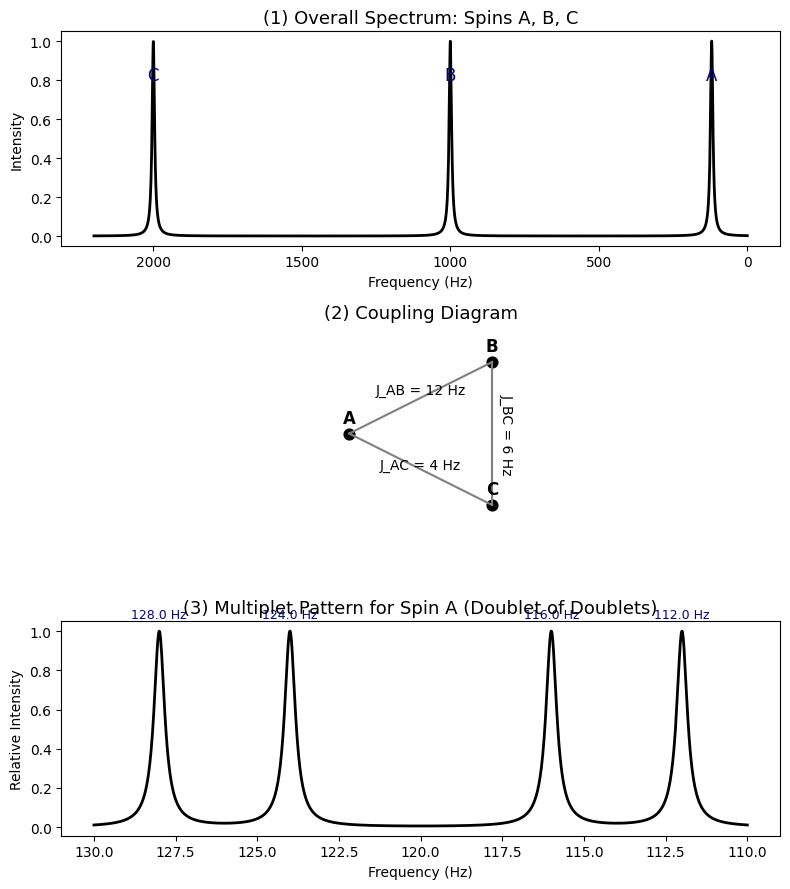

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# --- 1. OVERALL SPECTRUM (A, B, C) ---
fig, axes = plt.subplots(3, 1, figsize=(8, 9))


# Positions in Hz
shifts = {'A': 120, 'B': 1000, 'C': 2000}


# Draw single Lorentzian peaks for A, B, and C
def lorentzian(x, x0, width=10):
    return 1 / (1 + ((x - x0) / width) ** 2)


x = np.linspace(0, 2200, 4000)
y = lorentzian(x, shifts['A'], 5) + lorentzian(x, shifts['B'], 5) + lorentzian(x, shifts['C'], 5)


axes[0].plot(x, y, color='black', lw=2)
axes[0].invert_xaxis()
axes[0].set_title('(1) Overall Spectrum: Spins A, B, C', fontsize=13)
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Intensity')


for label, shift in shifts.items():
    axes[0].text(shift, 0.8, label, color='darkblue', fontsize=12, ha='center')


# --- 2. J-COUPLING DIAGRAM ---
axes[1].set_xlim(0, 3)
axes[1].set_ylim(0, 3)
axes[1].set_aspect('equal')
axes[1].axis('off')


# Coordinates for A, B, C
coords = {'A': (0.5, 1.5), 'B': (2.5, 2.5), 'C': (2.5, 0.5)}


# Draw nodes
for k, (x0, y0) in coords.items():
    axes[1].scatter(x0, y0, color='black', s=60)
    axes[1].text(x0, y0 + 0.15, k, ha='center', fontsize=12, weight='bold')


# Draw coupling lines
axes[1].plot([coords['A'][0], coords['B'][0]], [coords['A'][1], coords['B'][1]], 'gray', lw=1.5)
axes[1].text(1.5, 2.05, 'J_AB = 12 Hz', ha='center', fontsize=10)


axes[1].plot([coords['A'][0], coords['C'][0]], [coords['A'][1], coords['C'][1]], 'gray', lw=1.5)
axes[1].text(1.5, 1.0, 'J_AC = 4 Hz', ha='center', fontsize=10)


axes[1].plot([coords['B'][0], coords['C'][0]], [coords['B'][1], coords['C'][1]], 'gray', lw=1.5)
axes[1].text(2.6, 1.5, 'J_BC = 6 Hz', rotation=-90, va='center', fontsize=10)


axes[1].set_title('(2) Coupling Diagram', fontsize=13)


# --- 3. MULTIPLET FOR SPIN A ---
center = 120
J_AB = 12
J_AC = 4


# Peak positions (doublet of doublets)
doublet = [center - J_AB / 2, center + J_AB / 2]
multiplet = [doublet[0] - J_AC / 2, doublet[0] + J_AC / 2,
doublet[1] - J_AC / 2, doublet[1] + J_AC / 2]


x2 = np.linspace(110, 130, 2000)
y2 = np.zeros_like(x2)


for f in multiplet:
    y2 += lorentzian(x2, f, width=0.2)


y2 /= max(y2)
axes[2].plot(x2, y2, color='black', lw=2)
axes[2].invert_xaxis()
axes[2].set_title('(3) Multiplet Pattern for Spin A (Doublet of Doublets)', fontsize=13)
axes[2].set_xlabel('Frequency (Hz)')
axes[2].set_ylabel('Relative Intensity')


for f in multiplet:
    axes[2].text(f, 1.05, f"{f:.1f} Hz", ha='center', va='bottom', fontsize=9, color='darkblue')


plt.tight_layout()
plt.show()

In [14]:
def plot_overall_spectrum():
    shifts = {'A': 120, 'B': 1000, 'C': 2000}
    x = np.linspace(0, 2200, 4000)
    y = sum(lorentzian(x, s, 5) for s in shifts.values())

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, color='black', lw=2)
    plt.title('Overall Spectrum: Spins A, B, and C', fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Intensity', fontsize=12)

    plt.xlim(0, 2200)
    plt.ylim(0, 1.25)  # Increased y-limit for label space
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Annotate peaks above the peaks
    for label, shift in shifts.items():
        plt.text(shift, 1.08, label, color='darkblue', fontsize=12, ha='center', weight='bold', fontname='Times New Roman')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title
    plt.show()

def plot_spinA_multiplet():
    center = 120
    J_AB = 12
    J_AC = 4

    doublet = [center - J_AB / 2, center + J_AB / 2]
    multiplet = [doublet[0] - J_AC / 2, doublet[0] + J_AC / 2,
                  doublet[1] - J_AC / 2, doublet[1] + J_AC / 2]

    x = np.linspace(110, 130, 2000)
    y = np.zeros_like(x)

    for f in multiplet:
        y += lorentzian(x, f, width=0.25)

    y /= max(y)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, color='black', lw=2)
    plt.title('Multiplet Pattern for Spin A (Doublet of Doublets)', fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Relative Intensity', fontsize=12)

    plt.xlim(110, 130)
    plt.ylim(0, 1.18)  # Increased y-limit for label space
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Label each peak frequency above the peaks
    for f in multiplet:
        plt.text(f, 1.08, f"{f:.1f} Hz", ha='center', va='bottom', fontsize=10, color='darkblue', fontname='Times New Roman')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title
    plt.show()

In [15]:
def plot_spinA_multiplet():
    center = 120
    J_AB = 12
    J_AC = 4

    doublet = [center - J_AB / 2, center + J_AB / 2]
    multiplet = [doublet[0] - J_AC / 2, doublet[0] + J_AC / 2,
                  doublet[1] - J_AC / 2, doublet[1] + J_AC / 2]

    x = np.linspace(110, 130, 2000)
    y = np.zeros_like(x)

    for f in multiplet:
        y += lorentzian(x, f, width=0.25)

    y /= max(y)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, color='black', lw=2)
    plt.title('Multiplet Pattern for Spin A (Doublet of Doublets)', fontsize=14, fontweight='bold', fontname='Times New Roman')
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Relative Intensity', fontsize=12)

    plt.xlim(110, 130)
    plt.ylim(0, 1.18)  # Give more space above peaks
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Label each peak frequency slightly higher
    for f in multiplet:
        plt.text(f, 1.10, f"{f:.1f} Hz", ha='center', va='bottom', fontsize=10, color='darkblue', fontname='Times New Roman')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title
    plt.show()

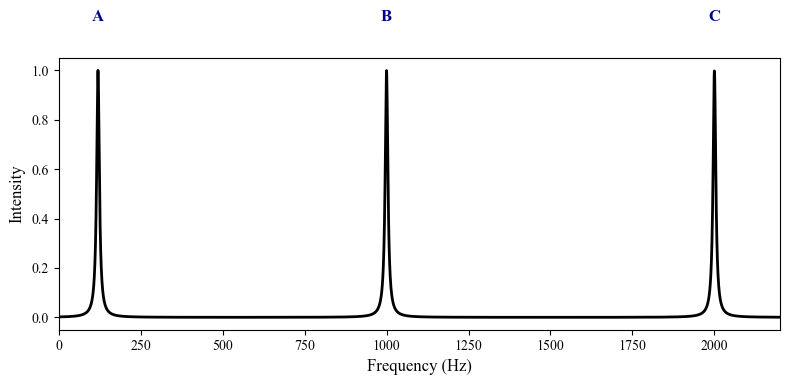

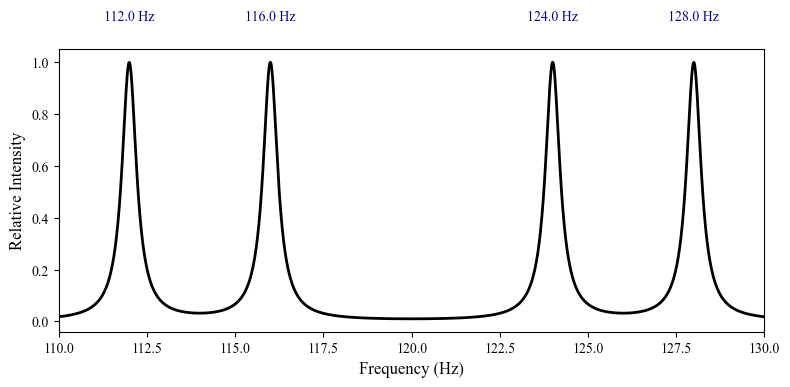

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Times New Roman'

# Helper: Lorentzian function
def lorentzian(x, x0, width=10):
    return 1 / (1 + ((x - x0) / width) ** 2)

# ---------------------------
# (1) OVERALL SPECTRUM (A, B, C)
# ---------------------------
def plot_overall_spectrum():
    shifts = {'A': 120, 'B': 1000, 'C': 2000}
    x = np.linspace(0, 2200, 4000)
    y = sum(lorentzian(x, s, 5) for s in shifts.values())

    plt.figure(figsize=(8, 4))
    plt.plot(x, y, color='black', lw=2)
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Intensity', fontsize=12)

    plt.xlim(0, 2200)
    plt.xticks(fontsize=10, fontfamily='Times New Roman')
    plt.yticks(fontsize=10, fontfamily='Times New Roman')

    # Adjusted labels placement so they don’t overlap peaks
    for label, shift in shifts.items():
        peak_y = lorentzian(shift, shift, 5)
        plt.text(shift, peak_y + 0.2, label, color='darkblue', fontsize=12, ha='center', weight='bold')

    plt.tight_layout()
    plt.show()

# ---------------------------
# (2) MULTIPLET FOR SPIN A
# ---------------------------
def plot_spinA_multiplet():
    center = 120
    J_AB = 12
    J_AC = 4

    doublet = [center - J_AB / 2, center + J_AB / 2]
    multiplet = [doublet[0] - J_AC / 2, doublet[0] + J_AC / 2,
                  doublet[1] - J_AC / 2, doublet[1] + J_AC / 2]

    x = np.linspace(110, 130, 2000)
    y = np.zeros_like(x)

    for f in multiplet:
        y += lorentzian(x, f, width=0.25)

    y /= max(y)

    plt.figure(figsize=(8, 4))
    plt.plot(x, y, color='black', lw=2)
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Relative Intensity', fontsize=12)

    plt.xlim(110, 130)
    plt.xticks(fontsize=10, fontfamily='Times New Roman')
    plt.yticks(fontsize=10, fontfamily='Times New Roman')

    # Label each peak frequency above peaks to avoid overlap
    for f in multiplet:
        peak_y = lorentzian(f, f, 0.25)
        plt.text(f, peak_y + 0.15, f"{f:.1f} Hz", ha='center', va='bottom', fontsize=10, color='darkblue')

    plt.tight_layout()
    plt.show()

# Run both plots
plot_overall_spectrum()
plot_spinA_multiplet()

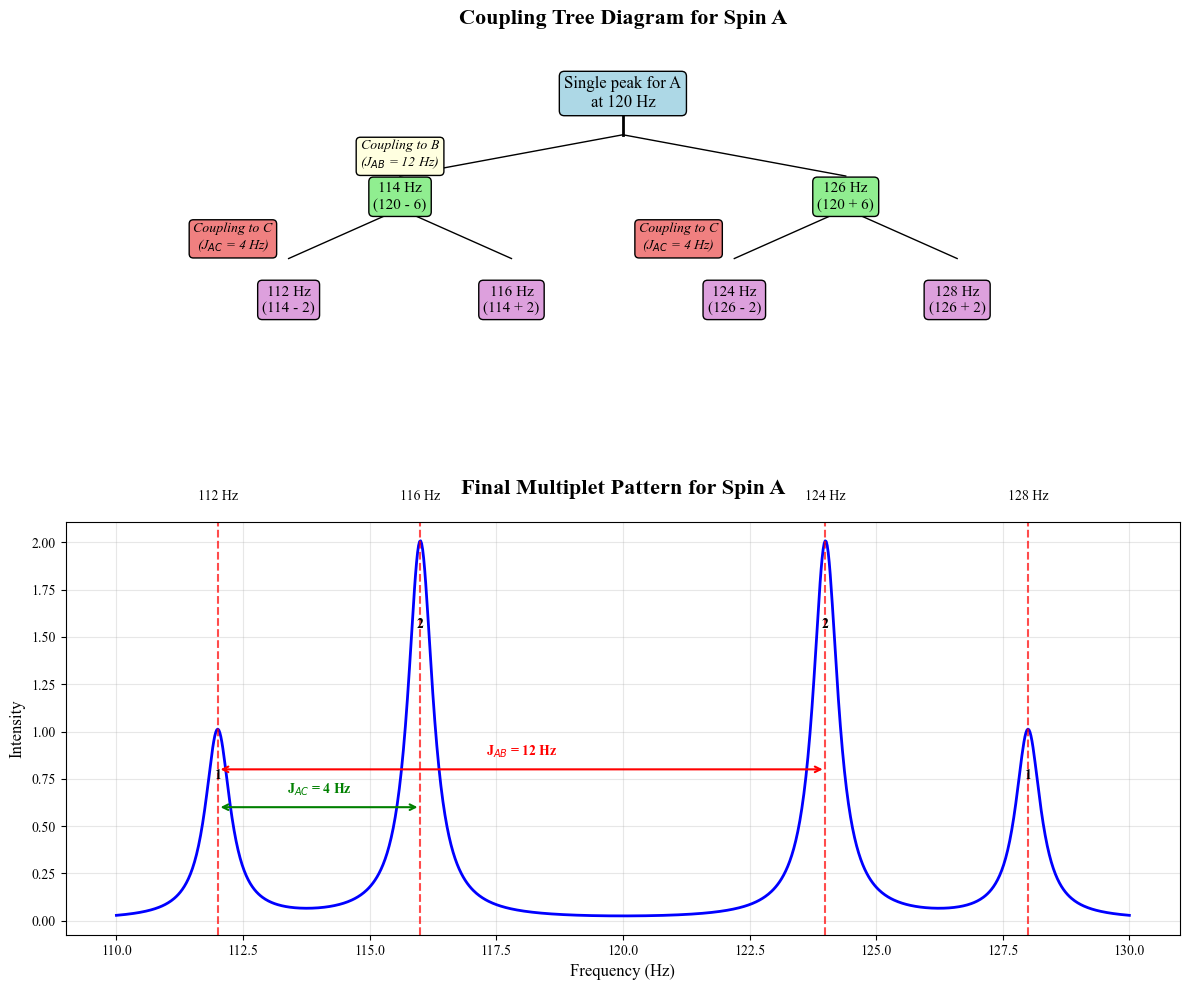

SUMMARY:
Chemical shift of A: 120 Hz
Coupling constants: J_AB = 12 Hz, J_AC = 4 Hz
Final peak positions: 112.0, 116.0, 124.0, 128.0 Hz
Relative intensities: 1:2:2:1
Pattern: Doublet of doublets


In [18]:
import matplotlib.pyplot as plt
import numpy as np

def create_coupling_tree_diagram():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Chemical shift and coupling constants
    chem_shift_A = 120  # Hz
    J_AB = 12  # Hz
    J_AC = 4   # Hz
    
    # Calculate peak positions
    peak1 = chem_shift_A - J_AB/2 - J_AC/2  # 112 Hz
    peak2 = chem_shift_A - J_AB/2 + J_AC/2  # 116 Hz  
    peak3 = chem_shift_A + J_AB/2 - J_AC/2  # 124 Hz
    peak4 = chem_shift_A + J_AB/2 + J_AC/2  # 128 Hz
    
    # ===== COUPLING TREE DIAGRAM =====
    ax1.axis('off')
    ax1.set_xlim(0, 100)
    ax1.set_ylim(0, 100)
    ax1.set_title('Coupling Tree Diagram for Spin A', fontsize=16, fontweight='bold', pad=20)
    
    # Starting point
    ax1.text(50, 90, 'Single peak for A\nat 120 Hz', ha='center', va='center', 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
    ax1.plot([50, 50], [87, 80], 'k-', lw=2)
    
    # First coupling (J_AB)
    ax1.text(30, 75, 'Coupling to B\n(J$_{AB}$ = 12 Hz)', ha='center', va='center', 
             fontsize=10, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
    ax1.plot([50, 30], [80, 70], 'k-', lw=1)
    ax1.plot([50, 70], [80, 70], 'k-', lw=1)
    
    # First doublet
    ax1.text(30, 65, '114 Hz\n(120 - 6)', ha='center', va='center', 
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
    ax1.text(70, 65, '126 Hz\n(120 + 6)', ha='center', va='center', 
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
    
    # Second coupling (J_AC)
    ax1.text(15, 55, 'Coupling to C\n(J$_{AC}$ = 4 Hz)', ha='center', va='center', 
             fontsize=10, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    ax1.text(55, 55, 'Coupling to C\n(J$_{AC}$ = 4 Hz)', ha='center', va='center', 
             fontsize=10, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    
    ax1.plot([30, 20], [62, 50], 'k-', lw=1)
    ax1.plot([30, 40], [62, 50], 'k-', lw=1)
    ax1.plot([70, 60], [62, 50], 'k-', lw=1)
    ax1.plot([70, 80], [62, 50], 'k-', lw=1)
    
    # Final quartet
    ax1.text(20, 40, '112 Hz\n(114 - 2)', ha='center', va='center', 
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="plum"))
    ax1.text(40, 40, '116 Hz\n(114 + 2)', ha='center', va='center', 
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="plum"))
    ax1.text(60, 40, '124 Hz\n(126 - 2)', ha='center', va='center', 
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="plum"))
    ax1.text(80, 40, '128 Hz\n(126 + 2)', ha='center', va='center', 
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="plum"))
    
    # ===== FINAL MULTIPLET PATTERN =====
    ax2.set_title('Final Multiplet Pattern for Spin A', fontsize=16, fontweight='bold', pad=20)
    
    # Create the spectrum
    frequencies = np.linspace(110, 130, 1000)
    spectrum = np.zeros_like(frequencies)
    
    # Add Lorentzian peaks
    def lorentzian(x, x0, intensity, width=0.3):
        return intensity * (width**2) / ((x - x0)**2 + width**2)
    
    # Peaks with 1:2:2:1 intensity
    spectrum += lorentzian(frequencies, peak1, 1.0)  # 112 Hz
    spectrum += lorentzian(frequencies, peak2, 2.0)  # 116 Hz  
    spectrum += lorentzian(frequencies, peak3, 2.0)  # 124 Hz
    spectrum += lorentzian(frequencies, peak4, 1.0)  # 128 Hz
    
    ax2.plot(frequencies, spectrum, 'b-', linewidth=2)
    ax2.set_xlabel('Frequency (Hz)', fontsize=12)
    ax2.set_ylabel('Intensity', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Mark peak positions
    for freq, intensity, label in zip([peak1, peak2, peak3, peak4], [1, 2, 2, 1], 
                                    ['112 Hz', '116 Hz', '124 Hz', '128 Hz']):
        ax2.axvline(x=freq, color='red', linestyle='--', alpha=0.7)
        ax2.text(freq, max(spectrum)*1.1, label, ha='center', va='bottom', fontsize=10)
    
    # Add coupling constant annotations
    ax2.annotate('', xy=(peak1, 0.6), xytext=(peak2, 0.6),
                arrowprops=dict(arrowstyle='<->', color='green', lw=1.5))
    ax2.text((peak1+peak2)/2, 0.65, 'J$_{AC}$ = 4 Hz', ha='center', va='bottom', 
             color='green', fontweight='bold')
    
    ax2.annotate('', xy=(peak1, 0.8), xytext=(peak3, 0.8),
                arrowprops=dict(arrowstyle='<->', color='red', lw=1.5))
    ax2.text((peak1+peak3)/2, 0.85, 'J$_{AB}$ = 12 Hz', ha='center', va='bottom', 
             color='red', fontweight='bold')
    
    # Add intensity labels
    for freq, intensity in zip([peak1, peak2, peak3, peak4], [1, 2, 2, 1]):
        ax2.text(freq, lorentzian(freq, freq, intensity)*0.8, f'{intensity}', 
                ha='center', va='top', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("SUMMARY:")
    print(f"Chemical shift of A: 120 Hz")
    print(f"Coupling constants: J_AB = 12 Hz, J_AC = 4 Hz")
    print(f"Final peak positions: {peak1}, {peak2}, {peak3}, {peak4} Hz")
    print(f"Relative intensities: 1:2:2:1")
    print(f"Pattern: Doublet of doublets")

# Create the diagram
create_coupling_tree_diagram()

Generating Coupling Tree Diagram...


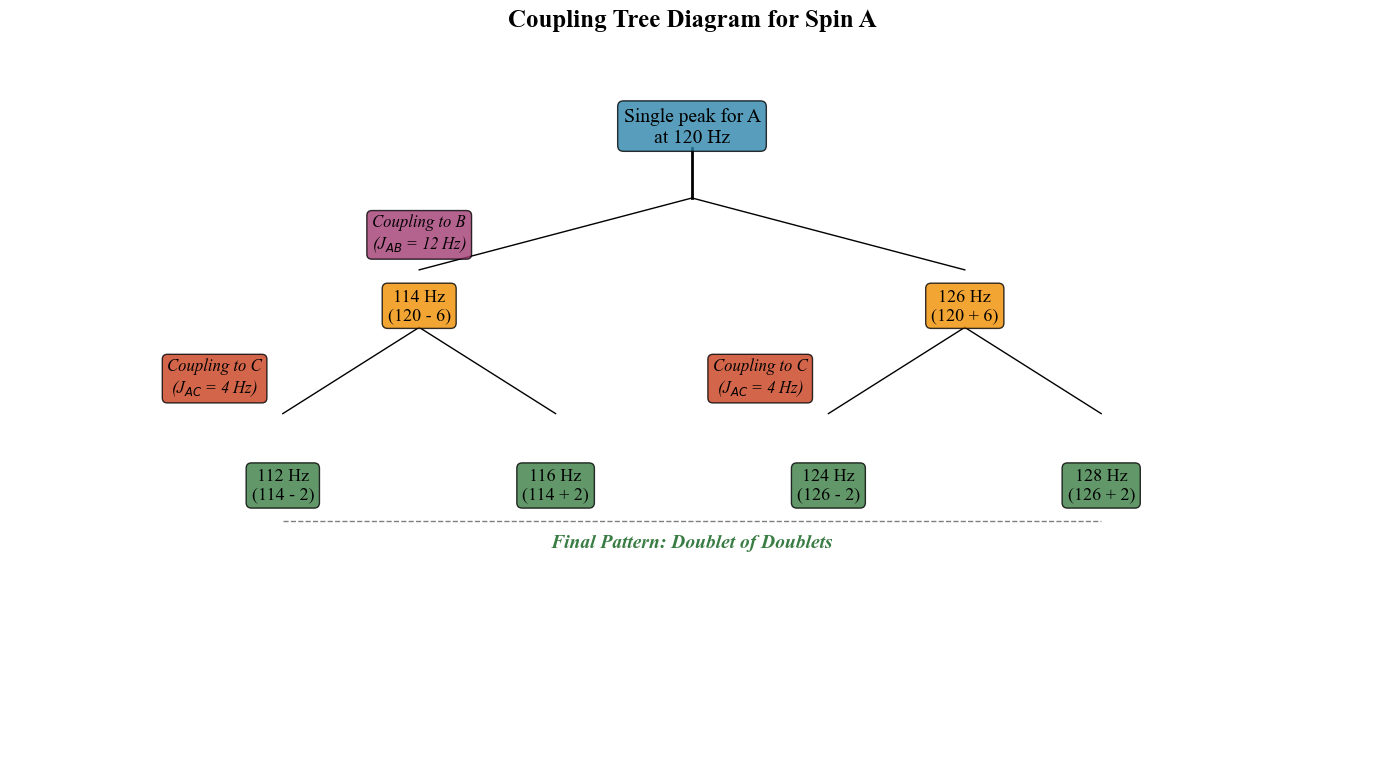


Generating Multiplet Pattern...


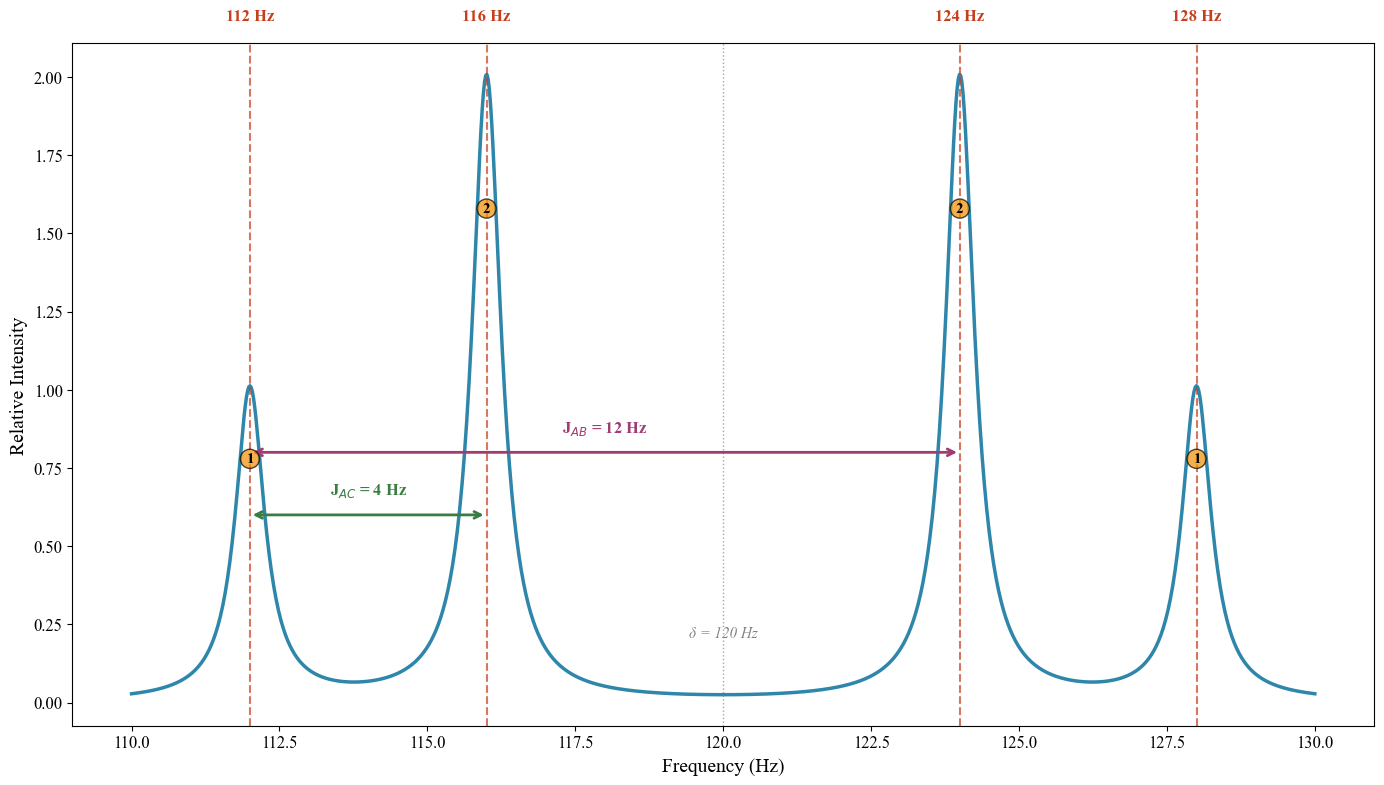

MULTIPLET PATTERN SUMMARY:
Chemical shift of A: 120 Hz
Coupling constants: J_AB = 12 Hz, J_AC = 4 Hz
Final peak positions: 112.0, 116.0, 124.0, 128.0 Hz
Relative intensities: 1:2:2:1
Pattern: Doublet of doublets


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

def create_coupling_tree_diagram():
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Chemical shift and coupling constants
    chem_shift_A = 120  # Hz
    J_AB = 12  # Hz
    J_AC = 4   # Hz
    
    # Calculate peak positions
    peak1 = chem_shift_A - J_AB/2 - J_AC/2  # 112 Hz
    peak2 = chem_shift_A - J_AB/2 + J_AC/2  # 116 Hz  
    peak3 = chem_shift_A + J_AB/2 - J_AC/2  # 124 Hz
    peak4 = chem_shift_A + J_AB/2 + J_AC/2  # 128 Hz
    
    # ===== COUPLING TREE DIAGRAM =====
    ax.axis('off')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_title('Coupling Tree Diagram for Spin A', fontsize=18, fontweight='bold', pad=20)
    
    # Color scheme - blue tones
    colors = {
        'start': '#2E86AB',       # Deep blue
        'coupling1': '#A23B72',   # Purple
        'doublet1': '#F18F01',    # Orange
        'coupling2': '#C73E1D',   # Red
        'final_peaks': '#3A7D44'  # Green
    }
    
    # Starting point
    ax.text(50, 90, 'Single peak for A\nat 120 Hz', ha='center', va='center', 
             fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['start'], alpha=0.8))
    ax.plot([50, 50], [87, 80], 'k-', lw=2)
    
    # First coupling (J_AB)
    ax.text(30, 75, 'Coupling to B\n(J$_{AB}$ = 12 Hz)', ha='center', va='center', 
             fontsize=12, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['coupling1'], alpha=0.8))
    ax.plot([50, 30], [80, 70], 'k-', lw=1)
    ax.plot([50, 70], [80, 70], 'k-', lw=1)
    
    # First doublet
    ax.text(30, 65, '114 Hz\n(120 - 6)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['doublet1'], alpha=0.8))
    ax.text(70, 65, '126 Hz\n(120 + 6)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['doublet1'], alpha=0.8))
    
    # Second coupling (J_AC)
    ax.text(15, 55, 'Coupling to C\n(J$_{AC}$ = 4 Hz)', ha='center', va='center', 
             fontsize=12, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['coupling2'], alpha=0.8))
    ax.text(55, 55, 'Coupling to C\n(J$_{AC}$ = 4 Hz)', ha='center', va='center', 
             fontsize=12, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['coupling2'], alpha=0.8))
    
    ax.plot([30, 20], [62, 50], 'k-', lw=1)
    ax.plot([30, 40], [62, 50], 'k-', lw=1)
    ax.plot([70, 60], [62, 50], 'k-', lw=1)
    ax.plot([70, 80], [62, 50], 'k-', lw=1)
    
    # Final quartet
    ax.text(20, 40, '112 Hz\n(114 - 2)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['final_peaks'], alpha=0.8))
    ax.text(40, 40, '116 Hz\n(114 + 2)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['final_peaks'], alpha=0.8))
    ax.text(60, 40, '124 Hz\n(126 - 2)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['final_peaks'], alpha=0.8))
    ax.text(80, 40, '128 Hz\n(126 + 2)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['final_peaks'], alpha=0.8))
    
    # Add connecting lines between final peaks to show the pattern
    ax.plot([20, 40, 60, 80], [35, 35, 35, 35], 'k--', alpha=0.5, lw=1)
    ax.text(50, 32, 'Final Pattern: Doublet of Doublets', ha='center', va='center', 
            fontsize=14, fontweight='bold', style='italic', color=colors['final_peaks'])
    
    plt.tight_layout()
    plt.savefig('coupling_tree_diagram.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_multiplet_pattern():
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Chemical shift and coupling constants
    chem_shift_A = 120  # Hz
    J_AB = 12  # Hz
    J_AC = 4   # Hz
    
    # Calculate peak positions
    peak1 = chem_shift_A - J_AB/2 - J_AC/2  # 112 Hz
    peak2 = chem_shift_A - J_AB/2 + J_AC/2  # 116 Hz  
    peak3 = chem_shift_A + J_AB/2 - J_AC/2  # 124 Hz
    peak4 = chem_shift_A + J_AB/2 + J_AC/2  # 128 Hz
    
    # ===== FINAL MULTIPLET PATTERN =====
    #ax.set_title('NMR Multiplet Pattern for Spin A', fontsize=18, fontweight='bold', pad=20)
    
    # Create the spectrum
    frequencies = np.linspace(110, 130, 1000)
    spectrum = np.zeros_like(frequencies)
    
    # Add Lorentzian peaks
    def lorentzian(x, x0, intensity, width=0.3):
        return intensity * (width**2) / ((x - x0)**2 + width**2)
    
    # Color scheme - coordinated with tree diagram
    colors = {
        'spectrum': '#2E86AB',    # Deep blue
        'peaks': '#C73E1D',       # Red
        'J_AC': '#3A7D44',        # Green
        'J_AB': '#A23B72',        # Purple
        'intensity': '#F18F01'    # Orange
    }
    
    # Peaks with 1:2:2:1 intensity
    spectrum += lorentzian(frequencies, peak1, 1.0)  # 112 Hz
    spectrum += lorentzian(frequencies, peak2, 2.0)  # 116 Hz  
    spectrum += lorentzian(frequencies, peak3, 2.0)  # 124 Hz
    spectrum += lorentzian(frequencies, peak4, 1.0)  # 128 Hz
    
    ax.plot(frequencies, spectrum, color=colors['spectrum'], linewidth=2.5)
    ax.set_xlabel('Frequency (Hz)', fontsize=14)
    ax.set_ylabel('Relative Intensity', fontsize=14)
    #ax.grid(True, alpha=0.3)
    
    # Mark peak positions
    for freq, intensity, label in zip([peak1, peak2, peak3, peak4], [1, 2, 2, 1], 
                                    ['112 Hz', '116 Hz', '124 Hz', '128 Hz']):
        ax.axvline(x=freq, color=colors['peaks'], linestyle='--', alpha=0.7, linewidth=1.5)
        ax.text(freq, max(spectrum)*1.08, label, ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color=colors['peaks'])
    
    # Add coupling constant annotations
    ax.annotate('', xy=(peak1, 0.6), xytext=(peak2, 0.6),
                arrowprops=dict(arrowstyle='<->', color=colors['J_AC'], lw=2))
    ax.text((peak1+peak2)/2, 0.65, 'J$_{AC}$ = 4 Hz', ha='center', va='bottom', 
             color=colors['J_AC'], fontweight='bold', fontsize=12)
    
    ax.annotate('', xy=(peak1, 0.8), xytext=(peak3, 0.8),
                arrowprops=dict(arrowstyle='<->', color=colors['J_AB'], lw=2))
    ax.text((peak1+peak3)/2, 0.85, 'J$_{AB}$ = 12 Hz', ha='center', va='bottom', 
             color=colors['J_AB'], fontweight='bold', fontsize=12)
    
    # Add intensity labels
    for freq, intensity in zip([peak1, peak2, peak3, peak4], [1, 2, 2, 1]):
        peak_height = lorentzian(freq, freq, intensity)
        ax.text(freq, peak_height*0.8, f'{intensity}', 
                ha='center', va='top', fontweight='bold', fontsize=11,
                bbox=dict(boxstyle="circle,pad=0.2", facecolor=colors['intensity'], alpha=0.7))
    
    # Add chemical shift reference
    ax.axvline(x=chem_shift_A, color='gray', linestyle=':', alpha=0.7, linewidth=1)
    ax.text(chem_shift_A, max(spectrum)*0.1, f'δ = {chem_shift_A} Hz', 
            ha='center', va='bottom', fontsize=11, style='italic', color='gray')
    
    plt.tight_layout()
    plt.savefig('multiplet_pattern.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary
    print("MULTIPLET PATTERN SUMMARY:")
    print(f"Chemical shift of A: 120 Hz")
    print(f"Coupling constants: J_AB = 12 Hz, J_AC = 4 Hz")
    print(f"Final peak positions: {peak1}, {peak2}, {peak3}, {peak4} Hz")
    print(f"Relative intensities: 1:2:2:1")
    print(f"Pattern: Doublet of doublets")

# Create the diagrams separately
print("Generating Coupling Tree Diagram...")
create_coupling_tree_diagram()

print("\nGenerating Multiplet Pattern...")
create_multiplet_pattern()

Generating Coupling Tree Diagram for J_AB = J_AC = 10 Hz...


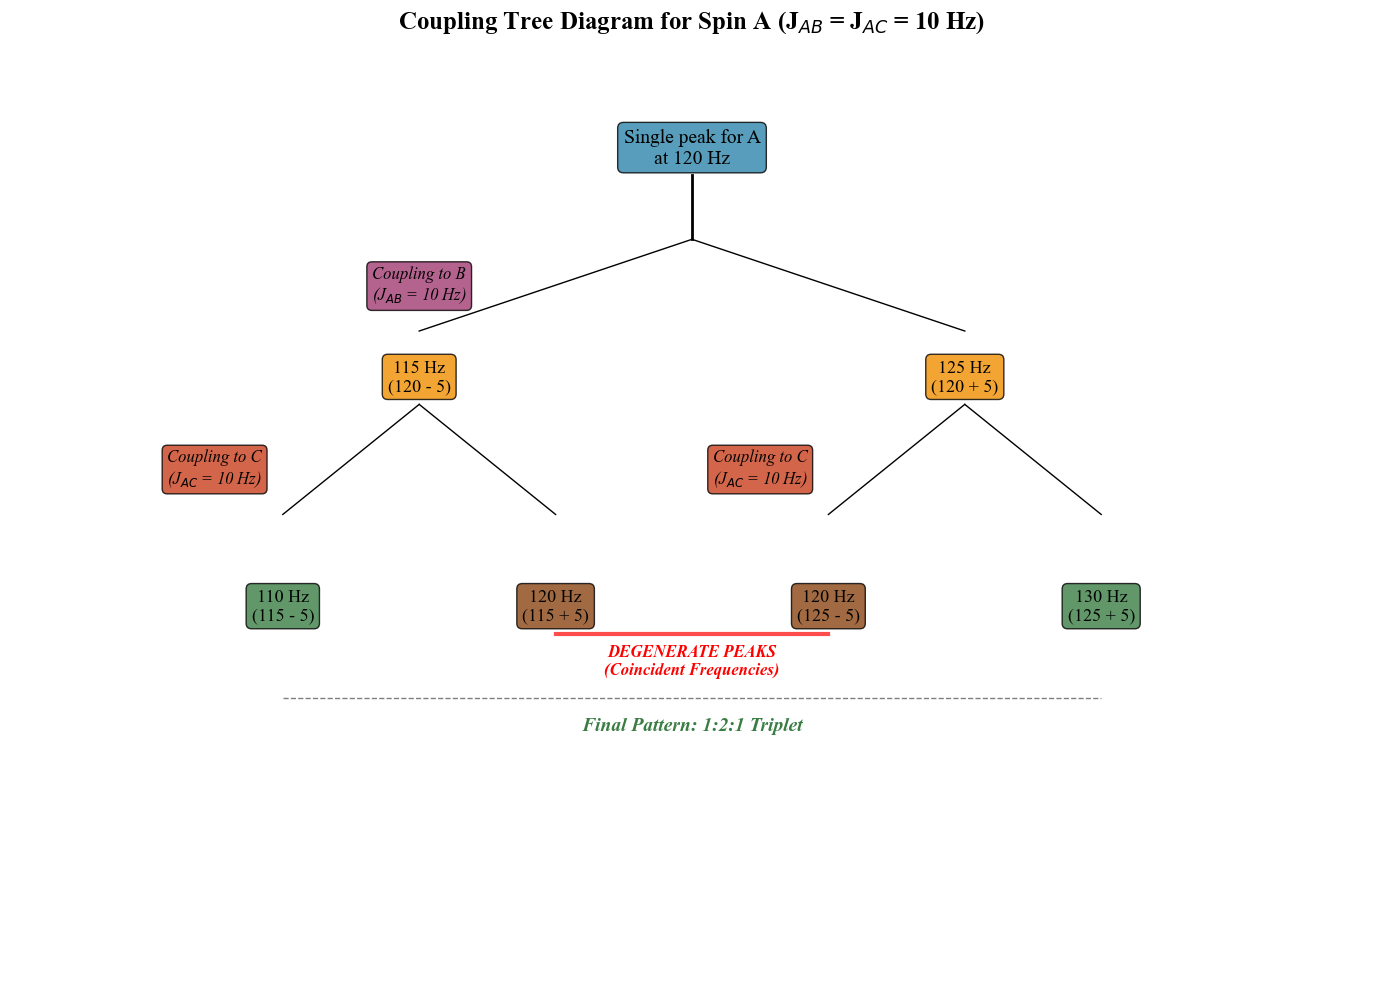


Generating Multiplet Pattern for J_AB = J_AC = 10 Hz...


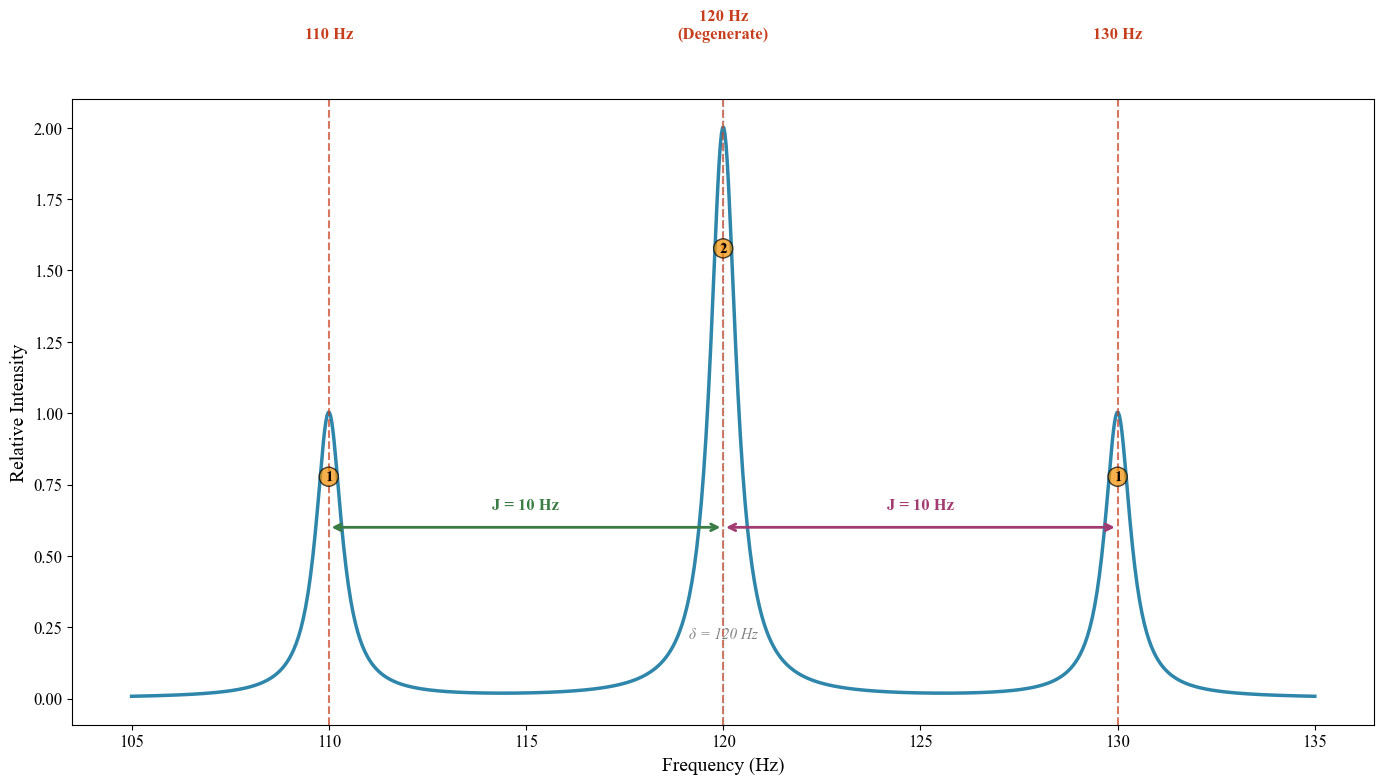

SPECIAL CASE: J_AB = J_AC = 10 Hz
Chemical shift of A: 120 Hz
Coupling constants: J_AB = 10 Hz, J_AC = 10 Hz
Calculated peak positions:
  Peak 1: 120 - 5 - 5 = 110 Hz
  Peak 2: 120 - 5 + 5 = 120 Hz
  Peak 3: 120 + 5 - 5 = 120 Hz  ← DEGENERATE!
  Peak 4: 120 + 5 + 5 = 130 Hz
Observed peaks: 110, 120, 130 Hz
Relative intensities: 1:2:1 (Triplet)
Pattern: 1:2:1 Triplet (NOT doublet of doublets!)

SPECIAL FEATURE: When J_AB = J_AC, two peaks become degenerate
(have the same frequency), resulting in a simpler triplet pattern.


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

def create_coupling_tree_diagram_equal_J():
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    
    # Chemical shift and coupling constants - EQUAL coupling constants
    chem_shift_A = 120  # Hz
    J_AB = 10  # Hz
    J_AC = 10  # Hz  - EQUAL to J_AB
    
    # Calculate peak positions
    peak1 = chem_shift_A - J_AB/2 - J_AC/2  # 120 - 5 - 5 = 110 Hz
    peak2 = chem_shift_A - J_AB/2 + J_AC/2  # 120 - 5 + 5 = 120 Hz  
    peak3 = chem_shift_A + J_AB/2 - J_AC/2  # 120 + 5 - 5 = 120 Hz
    peak4 = chem_shift_A + J_AB/2 + J_AC/2  # 120 + 5 + 5 = 130 Hz
    
    # ===== COUPLING TREE DIAGRAM =====
    ax.axis('off')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_title('Coupling Tree Diagram for Spin A (J$_{AB}$ = J$_{AC}$ = 10 Hz)', 
                 fontsize=18, fontweight='bold', pad=20)
    
    # Color scheme - blue tones
    colors = {
        'start': '#2E86AB',       # Deep blue
        'coupling1': '#A23B72',   # Purple
        'doublet1': '#F18F01',    # Orange
        'coupling2': '#C73E1D',   # Red
        'final_peaks': '#3A7D44', # Green
        'degenerate': '#8B4513'   # Brown for degenerate peaks
    }
    
    # Starting point
    ax.text(50, 90, 'Single peak for A\nat 120 Hz', ha='center', va='center', 
             fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['start'], alpha=0.8))
    ax.plot([50, 50], [87, 80], 'k-', lw=2)
    
    # First coupling (J_AB)
    ax.text(30, 75, 'Coupling to B\n(J$_{AB}$ = 10 Hz)', ha='center', va='center', 
             fontsize=12, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['coupling1'], alpha=0.8))
    ax.plot([50, 30], [80, 70], 'k-', lw=1)
    ax.plot([50, 70], [80, 70], 'k-', lw=1)
    
    # First doublet
    ax.text(30, 65, '115 Hz\n(120 - 5)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['doublet1'], alpha=0.8))
    ax.text(70, 65, '125 Hz\n(120 + 5)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['doublet1'], alpha=0.8))
    
    # Second coupling (J_AC) - NOTE: EQUAL coupling constant
    ax.text(15, 55, 'Coupling to C\n(J$_{AC}$ = 10 Hz)', ha='center', va='center', 
             fontsize=12, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['coupling2'], alpha=0.8))
    ax.text(55, 55, 'Coupling to C\n(J$_{AC}$ = 10 Hz)', ha='center', va='center', 
             fontsize=12, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['coupling2'], alpha=0.8))
    
    ax.plot([30, 20], [62, 50], 'k-', lw=1)
    ax.plot([30, 40], [62, 50], 'k-', lw=1)
    ax.plot([70, 60], [62, 50], 'k-', lw=1)
    ax.plot([70, 80], [62, 50], 'k-', lw=1)
    
    # Final peaks - NOTE THE DEGENERACY!
    ax.text(20, 40, '110 Hz\n(115 - 5)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['final_peaks'], alpha=0.8))
    ax.text(40, 40, '120 Hz\n(115 + 5)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['degenerate'], alpha=0.8))
    ax.text(60, 40, '120 Hz\n(125 - 5)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['degenerate'], alpha=0.8))
    ax.text(80, 40, '130 Hz\n(125 + 5)', ha='center', va='center', 
             fontsize=13, bbox=dict(boxstyle="round,pad=0.3", facecolor=colors['final_peaks'], alpha=0.8))
    
    # Highlight the degenerate peaks
    ax.plot([40, 60], [37, 37], 'r-', lw=3, alpha=0.7)
    ax.text(50, 34, 'DEGENERATE PEAKS\n(Coincident Frequencies)', ha='center', va='center', 
            fontsize=12, fontweight='bold', color='red', style='italic')
    
    # Add connecting lines between final peaks to show the pattern
    ax.plot([20, 40, 60, 80], [30, 30, 30, 30], 'k--', alpha=0.5, lw=1)
    ax.text(50, 27, 'Final Pattern: 1:2:1 Triplet', ha='center', va='center', 
            fontsize=14, fontweight='bold', style='italic', color=colors['final_peaks'])
    
    plt.tight_layout()
    plt.savefig('coupling_tree_equal_J.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_multiplet_pattern_equal_J():
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Chemical shift and coupling constants - EQUAL coupling constants
    chem_shift_A = 120  # Hz
    J_AB = 10  # Hz
    J_AC = 10  # Hz  - EQUAL to J_AB
    
    # Calculate peak positions - NOTE THE DEGENERACY!
    peak1 = chem_shift_A - J_AB/2 - J_AC/2  # 120 - 5 - 5 = 110 Hz
    peak2 = chem_shift_A - J_AB/2 + J_AC/2  # 120 - 5 + 5 = 120 Hz  
    peak3 = chem_shift_A + J_AB/2 - J_AC/2  # 120 + 5 - 5 = 120 Hz  (SAME as peak2!)
    peak4 = chem_shift_A + J_AB/2 + J_AC/2  # 120 + 5 + 5 = 130 Hz
    
    # ===== FINAL MULTIPLET PATTERN =====
    #ax.set_title('NMR Multiplet Pattern for Spin A (J$_{AB}$ = J$_{AC}$ = 10 Hz)\n' +
                 #'SPECIAL CASE: 1:2:1 Triplet due to Degenerate Peaks', 
                 #fontsize=16, fontweight='bold', pad=20)
    
    # Create the spectrum
    frequencies = np.linspace(105, 135, 1000)
    spectrum = np.zeros_like(frequencies)
    
    # Add Lorentzian peaks
    def lorentzian(x, x0, intensity, width=0.4):
        return intensity * (width**2) / ((x - x0)**2 + width**2)
    
    # Color scheme - coordinated with tree diagram
    colors = {
        'spectrum': '#2E86AB',    # Deep blue
        'peaks': '#C73E1D',       # Red
        'J_AC': '#3A7D44',        # Green
        'J_AB': '#A23B72',        # Purple
        'intensity': '#F18F01',   # Orange
        'degenerate': '#8B4513'   # Brown for degenerate peaks
    }
    
    # Peaks with 1:2:1 intensity due to degeneracy!
    spectrum += lorentzian(frequencies, peak1, 1.0)  # 110 Hz
    spectrum += lorentzian(frequencies, peak2, 2.0)  # 120 Hz - DOUBLE INTENSITY due to degeneracy!
    spectrum += lorentzian(frequencies, peak4, 1.0)  # 130 Hz
    
    ax.plot(frequencies, spectrum, color=colors['spectrum'], linewidth=2.5)
    ax.set_xlabel('Frequency (Hz)', fontsize=14)
    ax.set_ylabel('Relative Intensity', fontsize=14)
    #ax.grid(True, alpha=0.3)
    
    # Mark peak positions - ONLY 3 PEAKS!
    peak_positions = [peak1, peak2, peak4]
    peak_labels = ['110 Hz', '120 Hz\n(Degenerate)', '130 Hz']
    peak_intensities = [1, 2, 1]
    
    for freq, intensity, label in zip(peak_positions, peak_intensities, peak_labels):
        ax.axvline(x=freq, color=colors['peaks'], linestyle='--', alpha=0.7, linewidth=1.5)
        ax.text(freq, max(spectrum)*1.15, label, ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color=colors['peaks'])
    
    # Add coupling constant annotations - NOTE: Only one J value now!
    ax.annotate('', xy=(peak1, 0.6), xytext=(peak2, 0.6),
                arrowprops=dict(arrowstyle='<->', color=colors['J_AC'], lw=2))
    ax.text((peak1+peak2)/2, 0.65, 'J = 10 Hz', ha='center', va='bottom', 
             color=colors['J_AC'], fontweight='bold', fontsize=12)
    
    ax.annotate('', xy=(peak2, 0.6), xytext=(peak4, 0.6),
                arrowprops=dict(arrowstyle='<->', color=colors['J_AB'], lw=2))
    ax.text((peak2+peak4)/2, 0.65, 'J = 10 Hz', ha='center', va='bottom', 
             color=colors['J_AB'], fontweight='bold', fontsize=12)
    
    # Add intensity labels
    for freq, intensity in zip(peak_positions, peak_intensities):
        peak_height = lorentzian(freq, freq, intensity)
        ax.text(freq, peak_height*0.8, f'{intensity}', 
                ha='center', va='top', fontweight='bold', fontsize=11,
                bbox=dict(boxstyle="circle,pad=0.2", facecolor=colors['intensity'], alpha=0.7))
    
    # Add chemical shift reference
    ax.axvline(x=chem_shift_A, color='gray', linestyle=':', alpha=0.7, linewidth=1)
    ax.text(chem_shift_A, max(spectrum)*0.1, f'δ = {chem_shift_A} Hz', 
            ha='center', va='bottom', fontsize=11, style='italic', color='gray')
    
    # Add special note about degeneracy
    #ax.text(0.02, 0.98, 'SPECIAL FEATURE:\nWhen J$_{AB}$ = J$_{AC}$:\n' +
            #'• Two peaks become degenerate at 120 Hz\n' +
            #'• Doublet of doublets → 1:2:1 Triplet\n' +
            #'• Only THREE peaks observed instead of four', 
            #transform=ax.transAxes, fontsize=12, fontweight='bold', 
            #va='top', ha='left', bbox=dict(boxstyle="round,pad=0.5", facecolor='yellow', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('multiplet_pattern_equal_J.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary
    print("SPECIAL CASE: J_AB = J_AC = 10 Hz")
    print("=" * 50)
    print(f"Chemical shift of A: 120 Hz")
    print(f"Coupling constants: J_AB = 10 Hz, J_AC = 10 Hz")
    print(f"Calculated peak positions:")
    print(f"  Peak 1: 120 - 5 - 5 = 110 Hz")
    print(f"  Peak 2: 120 - 5 + 5 = 120 Hz")
    print(f"  Peak 3: 120 + 5 - 5 = 120 Hz  ← DEGENERATE!")
    print(f"  Peak 4: 120 + 5 + 5 = 130 Hz")
    print(f"Observed peaks: 110, 120, 130 Hz")
    print(f"Relative intensities: 1:2:1 (Triplet)")
    print(f"Pattern: 1:2:1 Triplet (NOT doublet of doublets!)")
    print(f"\nSPECIAL FEATURE: When J_AB = J_AC, two peaks become degenerate")
    print(f"(have the same frequency), resulting in a simpler triplet pattern.")

# Create the diagrams for the equal J case
print("Generating Coupling Tree Diagram for J_AB = J_AC = 10 Hz...")
create_coupling_tree_diagram_equal_J()

print("\nGenerating Multiplet Pattern for J_AB = J_AC = 10 Hz...")
create_multiplet_pattern_equal_J()